In [39]:
import sys

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Задание 1: На занятии мы разбирали, как осуществить поворот изображения с помощью матрицы поворота. Однако мы с вами заметили, что поворот происходит относительно нуля координат, что может приводить не совсем к тому результату, который мы ожидаем получить. Задача состоит в том, чтобы повернуть изображение относительно его центра (а не начала координат). Подсказка: вспомните идею решения, которую мы обсуждали на занятии - необходимо сделать перенос центра изображения в начало СК, затем осуществить поворот, а затем перенести обратно в центр. Дополнительный вопрос: можем ли мы эти три преобразования соединить в одно? Другими словами, построить композицию преобразований в виде единой матрицы? Как это сделать? Для проведения экспериментов используйте изображение messi5.jpg

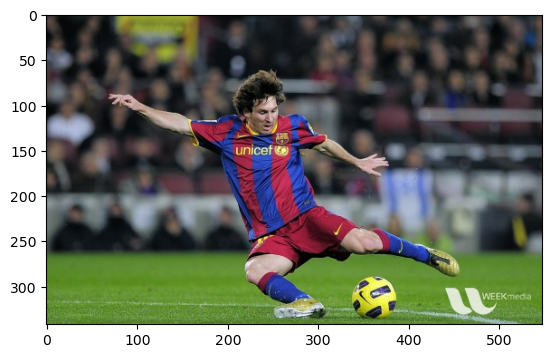

In [45]:
img = cv.imread("messi5.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
height, width = img.shape[:2]

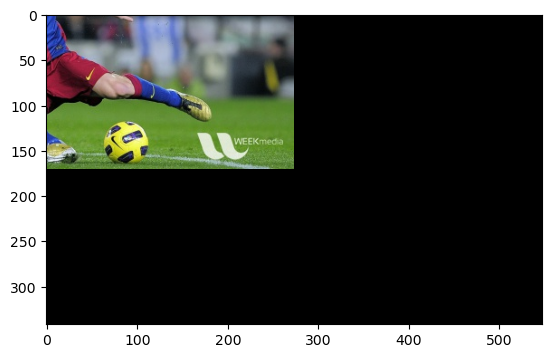

In [46]:
from math import sin, cos, pi

#сдвиг начала координат
tx = -width // 2
ty = -height // 2
M = np.float32([
    [1, 0, tx],
    [0, 1, ty],])
img_res = cv.warpAffine(img, M, (width, height))
plt.imshow(img_res)

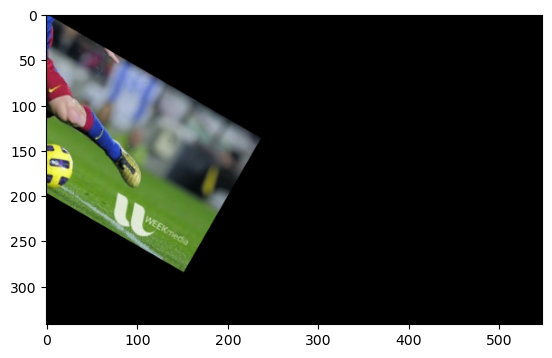

In [47]:
#поворот
angle = 30 * pi / 180
M = np.float32([
    [cos(angle) , -sin(angle), 0],
    [sin(angle), cos(angle), 0]])
img_res_1 = cv.warpAffine(img_res, M, (width, height))
plt.imshow(img_res_1)

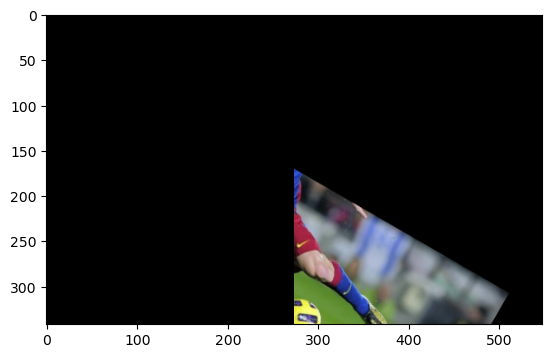

In [48]:
#возвращение

tx = width // 2
ty = height // 2
M = np.float32([
    [1, 0, tx],
    [0, 1, ty],])
img_res_2 = cv.warpAffine(img_res_1, M, (width, height))
plt.imshow(img_res_2)

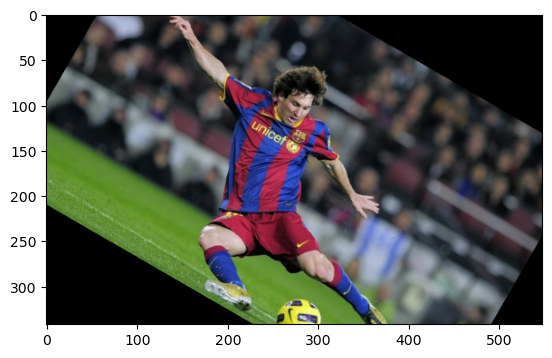

In [83]:
# За одно преобразование:

img = cv.imread("messi5.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
height, width = img.shape[:2]
tx = width // 2
ty = height // 2

M = np.float32([
    [cos(angle) , -sin(angle), tx - cos(angle) * tx + sin(angle) * ty],
    [sin(angle), cos(angle), ty - sin(angle) * tx - cos(angle) * ty]])

img_res3 = cv.warpAffine(img, M, (width, height))
plt.imshow(img_res3)

Задание 2: В папке находятся изображения (все кроме messi5.jpg), которые были подвернуты различным деформациям. Используя аффинные преобразования, необходимо "выправить" эти изображения (привести в исходный вид).

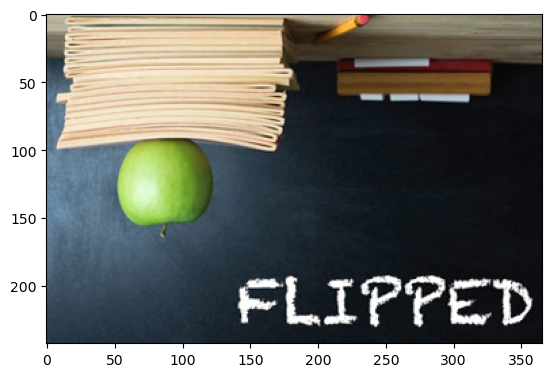

In [107]:
img = cv.imread("apple.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

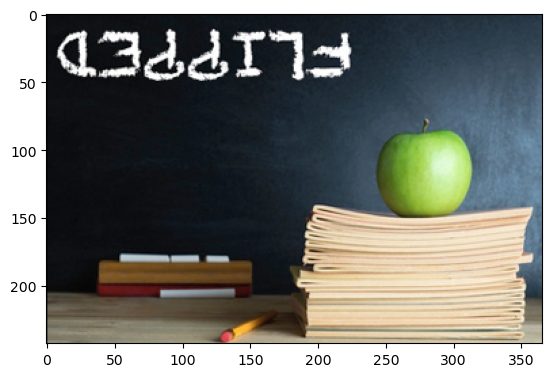

In [109]:
height, width = img.shape[:2]
tx = width // 2
ty = height // 2
angle = pi

M = np.float32([
    [cos(angle) , -sin(angle), tx - cos(angle) * tx + sin(angle) * ty],
    [sin(angle), cos(angle), ty - sin(angle) * tx - cos(angle) * ty]])

img_res3 = cv.warpAffine(img, M, (width, height))
plt.imshow(img_res3)

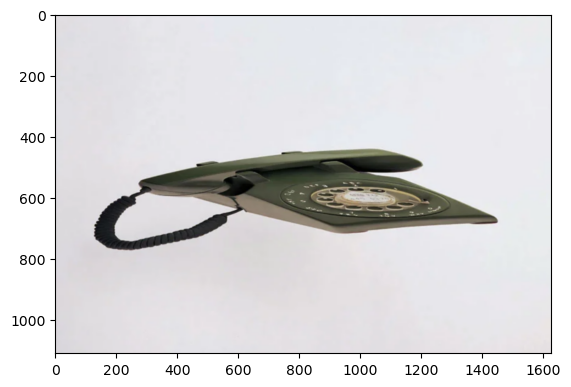

In [110]:
img = cv.imread("phone.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

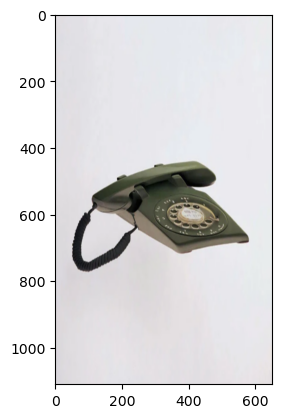

In [140]:
sx = 0.4
sy = 1
M = np.float32([
    [sx, 0, 0],
    [0, sy, 0],
]
)
height, width = img.shape[:2]
img_res3 = cv.warpAffine(img, M, (int(width * sx), int(height * sy)))
plt.imshow(img_res3)

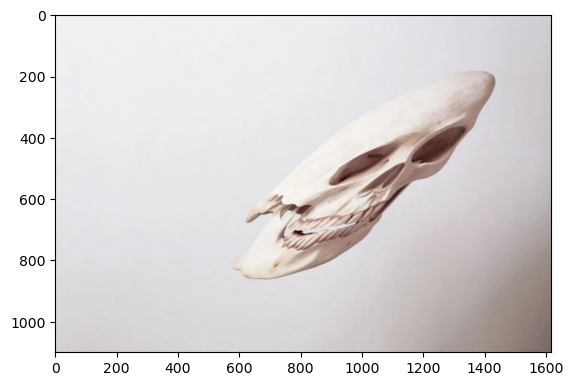

In [266]:
img = cv.imread("skull.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

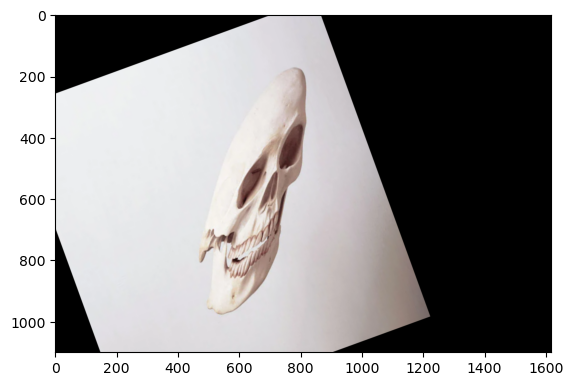

In [343]:
height, width = img.shape[:2]
sx = 0.65
sy = 1
M1 = np.float32([
    [sx, 0, 0],
    [0, sy, 0],
]
)

tx = width // 2
ty = height // 2
angle = - 20 * pi / 180

M = np.float32([
    [cos(angle) , -sin(angle), tx - cos(angle) * tx + sin(angle) * ty],
    [sin(angle), cos(angle), ty - sin(angle) * tx - cos(angle) * ty]])

img_res1 = cv.warpAffine(img, M1, (int(width * sx), int(height * sy)))
img_res2 = cv.warpAffine(img_res1, M, (width, height))
plt.imshow(img_res2)

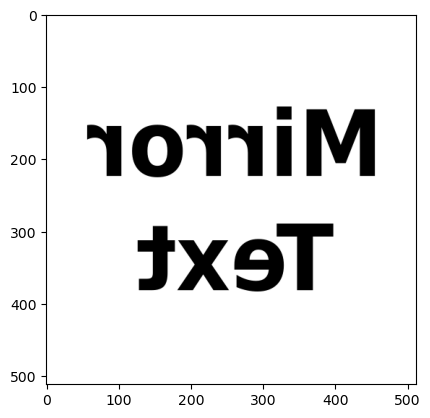

In [253]:
img = cv.imread("text.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

[[ -1.   0. 511.]
 [  0.   1.   0.]]


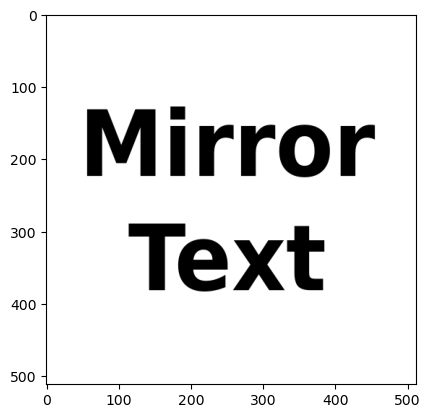

In [264]:
height, width = img.shape[:2]

input_pts = np.float32([[0,0], [width-1,0], [0,height-1]])
output_pts = np.float32([[width-1,0], [0,0], [width-1,height-1]])
 
M = cv.getAffineTransform(input_pts , output_pts)
print(M)
img_res = cv.warpAffine(img, M, (width, height))
plt.imshow(img_res)